## STA 160 Final Project

Adam Hetherwick and Woojin Son

05/12/2024

### Package Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from kmodes.kmodes import KModes

### Reading Data

data: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

In [2]:
data = pd.read_csv("C:/Users/cheif/STA_160/heart_disease_health_indicators_BRFSS2015.csv")

In [3]:
data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
data.shape

(253680, 22)

In [5]:
data.head(n=6)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0


### Summary Statistics

#### General summary statistics

In [8]:
data.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [36]:
unique_vals_dict = {}
names = []
unique_val_count = []
unique_val_min = []
unique_val_max = []
unique_val_median = []

for col in data.columns:
    if len(set(data[col])) > 3:
        names.append(col)
        unique_val_count.append(len(set(data[col])))
        unique_val_min.append(min(data[col]))
        unique_val_median.append(np.median(data[col]))
        unique_val_max.append(max(data[col]))

unique_vals_dict['Column'] = names
unique_vals_dict['Unique_Value_Count'] = unique_val_count
unique_vals_dict['Minimum'] = unique_val_min
unique_vals_dict['Median'] = unique_val_median
unique_vals_dict['Max'] = unique_val_max

pd.DataFrame(unique_vals_dict)

,Column,Unique_Value_Count,Minimum,Median,Max
0,BMI,84,12.0,27.0,98.0
1,GenHlth,5,1.0,2.0,5.0
2,MentHlth,31,0.0,0.0,30.0
3,PhysHlth,31,0.0,0.0,30.0
4,Age,13,1.0,8.0,13.0
5,Education,6,1.0,5.0,6.0
6,Income,8,1.0,7.0,8.0


In [50]:
unique_vals_dict = {}
names = []
prop_zero = []
prop_one = []
prop_two = []
unique_val_freq_dict = []

for col in data.columns:
    if len(set(data[col])) <= 3:
        names.append(col)
        freq_dict = dict((data[col].value_counts() / len(data[col])).round(3))
        prop_zero.append(freq_dict[0.0])
        prop_one.append(freq_dict[1.0])
        if len(freq_dict.keys()) <= 2:
            prop_two.append('-')
        else:
            prop_two.append(freq_dict[2.0])

unique_vals_dict['Column'] = names
unique_vals_dict['Frequency_0'] = prop_zero
unique_vals_dict['Frequency_1'] = prop_one
unique_vals_dict['Frequency_2'] = prop_two

pd.DataFrame(unique_vals_dict)

,Column,Frequency_0,Frequency_1,Frequency_2
0,HeartDiseaseorAttack,0.906,0.094,-
1,HighBP,0.571,0.429,-
2,HighChol,0.576,0.424,-
3,CholCheck,0.037,0.963,-
4,Smoker,0.557,0.443,-
5,Stroke,0.959,0.041,-
6,Diabetes,0.842,0.018,0.139
7,PhysActivity,0.243,0.757,-
8,Fruits,0.366,0.634,-
9,Veggies,0.189,0.811,-


In [18]:
# The code in this cell is duplicate of some cells in 'Adressing Data Imbalance'.
# I have it up here too so that if running cells sequentially it will work no bugs.

data_targets = data[['HeartDiseaseorAttack', 'Stroke', 'Diabetes']]
data_labels = []

for index, row in data_targets.iterrows():
    heart = row['HeartDiseaseorAttack']
    stroke = row['Stroke']
    diabetes = row['Diabetes']
    
    if heart == 0 and stroke == 0 and diabetes == 0:
        data_labels.append('Healthy')
    elif heart == 0 and stroke == 0 and diabetes == 1:
        data_labels.append('PreDiabetic')
    elif heart == 0 and stroke == 0 and diabetes == 2:
        data_labels.append('Diabetic')
    elif heart == 0 and stroke == 1 and diabetes == 0:
        data_labels.append('Stroke')
    elif heart == 0 and stroke == 1 and diabetes == 1:
        data_labels.append('Stroke_PreDiabetic')
    elif heart == 0 and stroke == 1 and diabetes == 2:
        data_labels.append('Stroke_Diabetic')
    elif heart == 1 and stroke == 0 and diabetes == 0:
        data_labels.append('Heart')
    elif heart == 1 and stroke == 0 and diabetes == 1:
        data_labels.append('Heart_PreDiabetic')
    elif heart == 1 and stroke == 0 and diabetes == 2:
        data_labels.append('Heart_Diabetes')
    elif heart == 1 and stroke == 1 and diabetes == 0:
        data_labels.append('Heart_Stroke')
    elif heart == 1 and stroke == 1 and diabetes == 1:
        data_labels.append('Heart_Stroke_PreDiabetic')
    elif heart == 1 and stroke == 1 and diabetes == 2:
        data_labels.append('Heart_Stroke_Diabetic')

#### Discrete Proportions

In [7]:
continuous_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'GenHlth']
data_categorical = data.drop(columns=continuous_cols)
data_categorical.head(n=3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [51]:
categorical_response_cols

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

In [90]:
data_summary = {}
health_circumstances = []
HeartDiseaseorAttack, HighBP, HighChol, CholCheck, Smoker, Stroke, Diabetes = [], [], [], [], [], [], []
PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex = [], [], [], [], [], [], [], []
categorical_response_cols = data_categorical.columns

for disease_combo in set(data_labels):
    health_circumstances += (disease_combo + '_0', disease_combo + '_1')
    if disease_combo == 'Healthy':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 0) & (data_categorical['Stroke'] == 0) & (data_categorical['Diabetes'] == 0)]
    elif disease_combo == 'PreDiabetic':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 0) & (data_categorical['Stroke'] == 0) & (data_categorical['Diabetes'] == 1)]
    elif disease_combo == 'Diabetic':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 0) & (data_categorical['Stroke'] == 0) & (data_categorical['Diabetes'] == 2)]
    elif disease_combo == 'Stroke':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 0) & (data_categorical['Stroke'] == 1) & (data_categorical['Diabetes'] == 0)]
    elif disease_combo == 'Stroke_PreDiabetic':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 0) & (data_categorical['Stroke'] == 1) & (data_categorical['Diabetes'] == 1)]
    elif disease_combo == 'Stroke_Diabetic':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 0) & (data_categorical['Stroke'] == 1) & (data_categorical['Diabetes'] == 2)]
    elif disease_combo == 'Heart':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 1) & (data_categorical['Stroke'] == 0) & (data_categorical['Diabetes'] == 0)]
    elif disease_combo == 'Heart_Prediabetic':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 1) & (data_categorical['Stroke'] == 0) & (data_categorical['Diabetes'] == 1)]
    elif disease_combo == 'Heart_Diabetes':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 1) & (data_categorical['Stroke'] == 0) & (data_categorical['Diabetes'] == 2)]
    elif disease_combo == 'Heart_Stroke':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 1) & (data_categorical['Stroke'] == 1) & (data_categorical['Diabetes'] == 0)]
    elif disease_combo == 'Heart_Stroke_PreDiabetic':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 1) & (data_categorical['Stroke'] == 1) & (data_categorical['Diabetes'] == 1)]
    elif disease_combo == 'Heart_Stroke_Diabetic':
        temp_df = data_categorical[(data_categorical['HeartDiseaseorAttack'] == 1) & (data_categorical['Stroke'] == 1) & (data_categorical['Diabetes'] == 2)]

# HeartDiseaseorAttack, HighBP, HighChol, CholCheck, Smoker, Stroke, Diabetes = [], [], [], [], [], [], []
# PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex = [], [], [], [], [], [], [], []
    
    for col in categorical_response_cols:
        prop_zero = (temp_df[col] == 0).sum() / len(temp_df[col])
        prop_one = (temp_df[col] == 1).sum() / len(temp_df[col])
        if col == 'HeartDiseaseorAttack':
            HeartDiseaseorAttack += (prop_zero, prop_one)
        if col == 'HighBP':
            HighBP += (prop_zero, prop_one)
        if col == 'HighChol':
            HighChol += (prop_zero, prop_one)
        if col == 'CholCheck':
            CholCheck += (prop_zero, prop_one)
        if col == 'Smoker':
            Smoker += (prop_zero, prop_one)
        if col == 'Stroke':
            Stroke += (prop_zero, prop_one)
        if col == 'Diabetes':
            Diabetes += (prop_zero, prop_one)
        if col == 'PhysActivity':
            PhysActivity += (prop_zero, prop_one)
        if col == 'Fruits':
            Fruits += (prop_zero, prop_one)
        if col == 'Veggies':
            Veggies += (prop_zero, prop_one)
        if col == 'HvyAlcoholConsump':
            HvyAlcoholConsump += (prop_zero, prop_one)
        if col == 'AnyHealthcare':
            AnyHealthcare += (prop_zero, prop_one)
        if col == 'NoDocbcCost':
            NoDocbcCost += (prop_zero, prop_one)
        if col == 'DiffWalk':
            DiffWalk += (prop_zero, prop_one)
        if col == 'Sex':
            Sex += (prop_zero, prop_one)

data_summary['Value'] = [i % 2 for i in range(24)]
data_summary['HighBP'] = HighBP
data_summary['HighChol'] = HighChol
data_summary['CholCheck'] = CholCheck
data_summary['Smoker'] = Smoker
data_summary['PhysActivity'] = PhysActivity
data_summary['Fruits'] = Fruits
data_summary['Veggies'] = Veggies
data_summary['HvyAlcoholConsump'] = HvyAlcoholConsump
data_summary['AnyHealthCare'] = AnyHealthcare
data_summary['NoDocbcCost'] = NoDocbcCost
data_summary['DiffWalk'] = DiffWalk
data_summary['Sex'] = Sex
data_summary = pd.DataFrame(data_summary)

data_summary.index = health_circumstances

In [91]:
data_summary

,Value,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthCare,NoDocbcCost,DiffWalk,Sex
Heart_Stroke_0,0,0.238182,0.330455,0.015455,0.349091,0.394091,0.395909,0.260000,0.958636,0.039091,0.838182,0.477273,0.490909
Heart_Stroke_1,1,0.761818,0.669545,0.984545,0.650909,0.605909,0.604091,0.740000,0.041364,0.960909,0.161818,0.522727,0.509091
Healthy_0,0,0.661314,0.647655,0.045740,0.588076,0.210142,0.354357,0.173144,0.936499,0.051555,0.922985,0.890347,0.576311
Healthy_1,1,0.338686,0.352345,0.954260,0.411924,0.789858,0.645643,0.826856,0.063501,0.948445,0.077015,0.109653,0.423689
Heart_PreDiabetic_0,0,0.661314,0.647655,0.045740,0.588076,0.210142,0.354357,0.173144,0.936499,0.051555,0.922985,0.890347,0.576311
Heart_PreDiabetic_1,1,0.338686,0.352345,0.954260,0.411924,0.789858,0.645643,0.826856,0.063501,0.948445,0.077015,0.109653,0.423689
Heart_Stroke_PreDiabetic_0,0,0.188119,0.217822,0.029703,0.237624,0.415842,0.455446,0.247525,1.000000,0.059406,0.792079,0.366337,0.564356
Heart_Stroke_PreDiabetic_1,1,0.811881,0.782178,0.970297,0.762376,0.584158,0.544554,0.752475,0.000000,0.940594,0.207921,0.633663,0.435644
Stroke_0,0,0.352709,0.445273,0.020399,0.441544,0.333406,0.381663,0.247861,0.948234,0.039263,0.893178,0.625356,0.597499
Stroke_1,1,0.647291,0.554727,0.979601,0.558456,0.666594,0.618337,0.752139,0.051766,0.960737,0.106822,0.374644,0.402501


In [92]:
color_map = 'RdBu'
cmap = cm.get_cmap(color_map)
reversed_cmap = cmap.reversed()

data_summary_colors = data_summary.drop(columns=['Value'])
data_summary_colors = data_summary_colors.style.background_gradient(cmap=reversed_cmap)

data_summary_colors

C:\Users\cheif\AppData\Local\Temp\ipykernel_6320\3541607473.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthCare,NoDocbcCost,DiffWalk,Sex
Heart_Stroke_0,0.238182,0.330455,0.015455,0.349091,0.394091,0.395909,0.260000,0.958636,0.039091,0.838182,0.477273,0.490909
Heart_Stroke_1,0.761818,0.669545,0.984545,0.650909,0.605909,0.604091,0.740000,0.041364,0.960909,0.161818,0.522727,0.509091
Healthy_0,0.661314,0.647655,0.045740,0.588076,0.210142,0.354357,0.173144,0.936499,0.051555,0.922985,0.890347,0.576311
Healthy_1,0.338686,0.352345,0.954260,0.411924,0.789858,0.645643,0.826856,0.063501,0.948445,0.077015,0.109653,0.423689
Heart_PreDiabetic_0,0.661314,0.647655,0.045740,0.588076,0.210142,0.354357,0.173144,0.936499,0.051555,0.922985,0.890347,0.576311
Heart_PreDiabetic_1,0.338686,0.352345,0.954260,0.411924,0.789858,0.645643,0.826856,0.063501,0.948445,0.077015,0.109653,0.423689
Heart_Stroke_PreDiabetic_0,0.188119,0.217822,0.029703,0.237624,0.415842,0.455446,0.247525,1.000000,0.059406,0.792079,0.366337,0.564356
Heart_Stroke_PreDiabetic_1,0.811881,0.782178,0.970297,0.762376,0.584158,0.544554,0.752475,0.000000,0.940594,0.207921,0.633663,0.435644
Stroke_0,0.352709,0.445273,0.020399,0.441544,0.333406,0.381663,0.247861,0.948234,0.039263,0.893178,0.625356,0.597499
Stroke_1,0.647291,0.554727,0.979601,0.558456,0.666594,0.618337,0.752139,0.051766,0.960737,0.106822,0.374644,0.402501


In [93]:
data_summary_colors.to_html('Data_Summary_Colors.html', index=False)

#### Continuous Histograms

In [4]:
data.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [13]:
continuous_cols

['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'GenHlth']

In [16]:
categorical_cols

['HeartDiseaseorAttack',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

In [20]:
all_cols = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
categorical_cols = []

for col in all_cols:
    if col not in continuous_cols:
        categorical_cols.append(col)

data_continuous = data.drop(columns=list(categorical_cols))
data_continuous['health_circumstances'] = data_labels
data_continuous.head(n=3)

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,health_circumstances
0,40.0,5.0,18.0,15.0,9.0,4.0,3.0,Healthy
1,25.0,3.0,0.0,0.0,7.0,6.0,1.0,Healthy
2,28.0,5.0,30.0,30.0,9.0,4.0,8.0,Healthy


In [21]:
data_continuous.shape

(253680, 8)

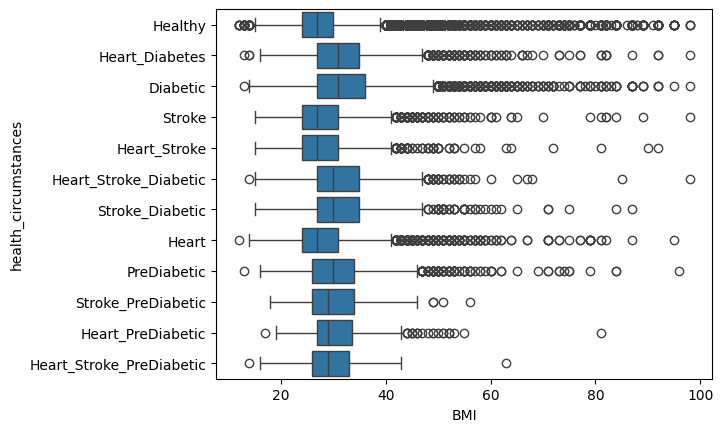

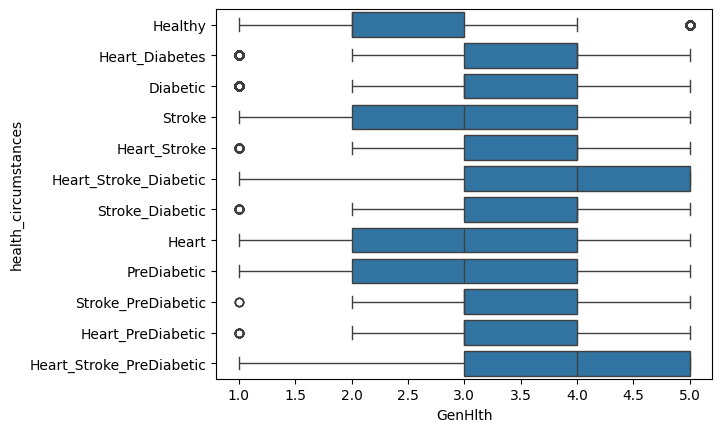

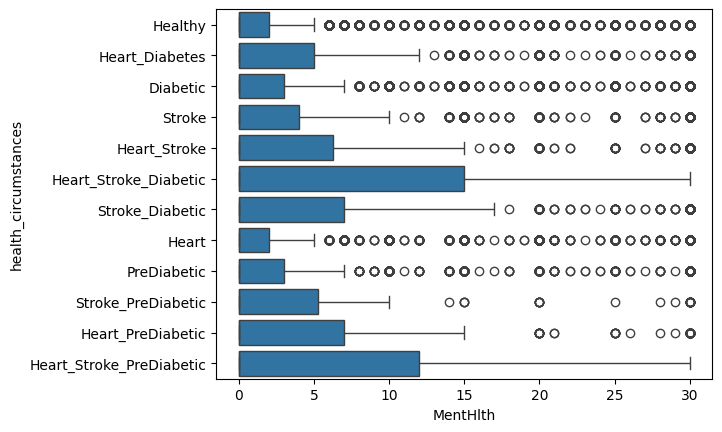

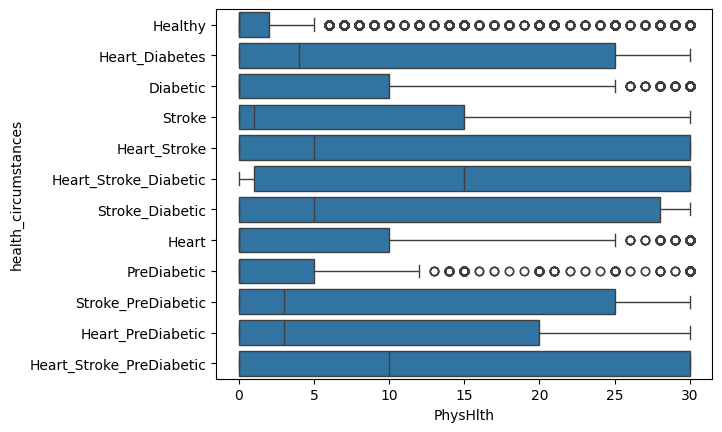

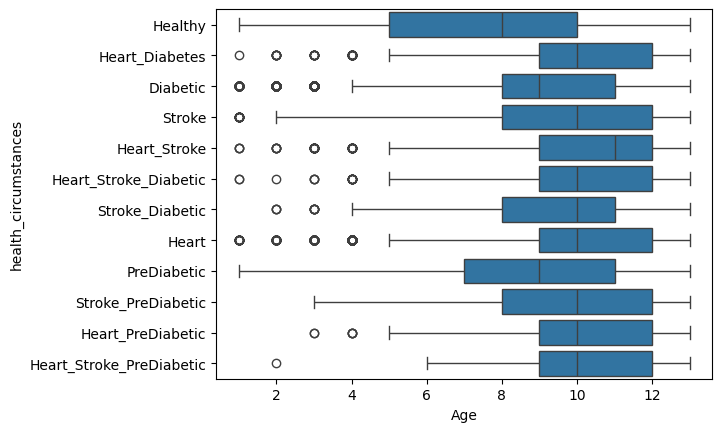

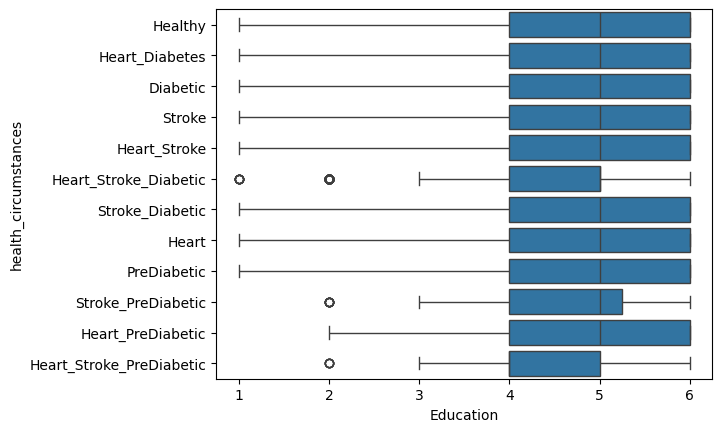

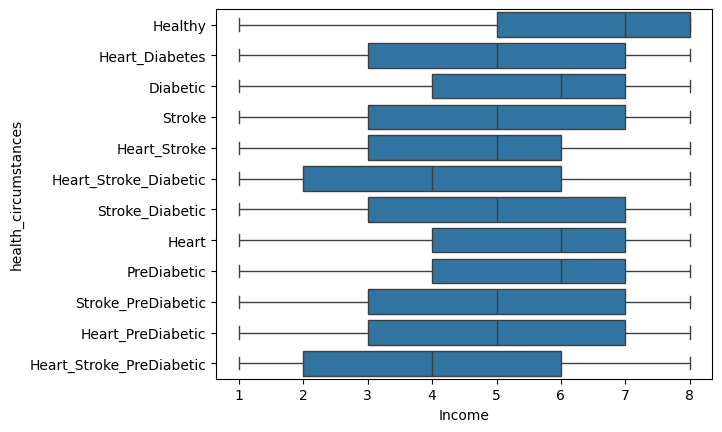

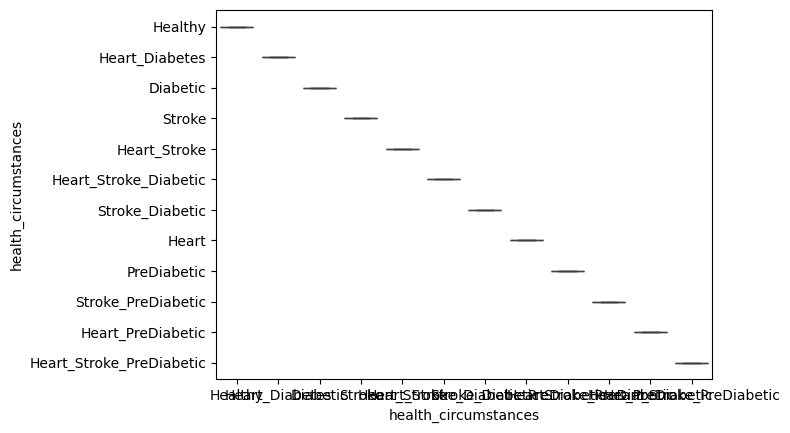

<Figure size 640x480 with 0 Axes>

In [30]:
for val in data_continuous.columns:
    sns.boxplot(x=val, y='health_circumstances', data=data_continuous)
    plt.show()
    plt.savefig('Continuous_Distribution_' + val + '.png')

### Covariance Matrices and Subset DataFrames

In [53]:
data_subset = data.drop(columns=['HeartDiseaseorAttack', 'Stroke', 'Diabetes'])
data_subset.shape

(253680, 19)

In [54]:
data_subset.head(n=6)

,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,1.0,1.0,1.0,25.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0


In [55]:
cov_matrix_subset = np.cov(data_subset, rowvar=False)

In [56]:
cov_matrix_subset.shape

(19, 19)

In [57]:
row_titles_subset = data_subset.columns

In [58]:
mask_subset = np.eye(len(cov_matrix_subset), dtype='bool')
mask_subset.shape

(19, 19)

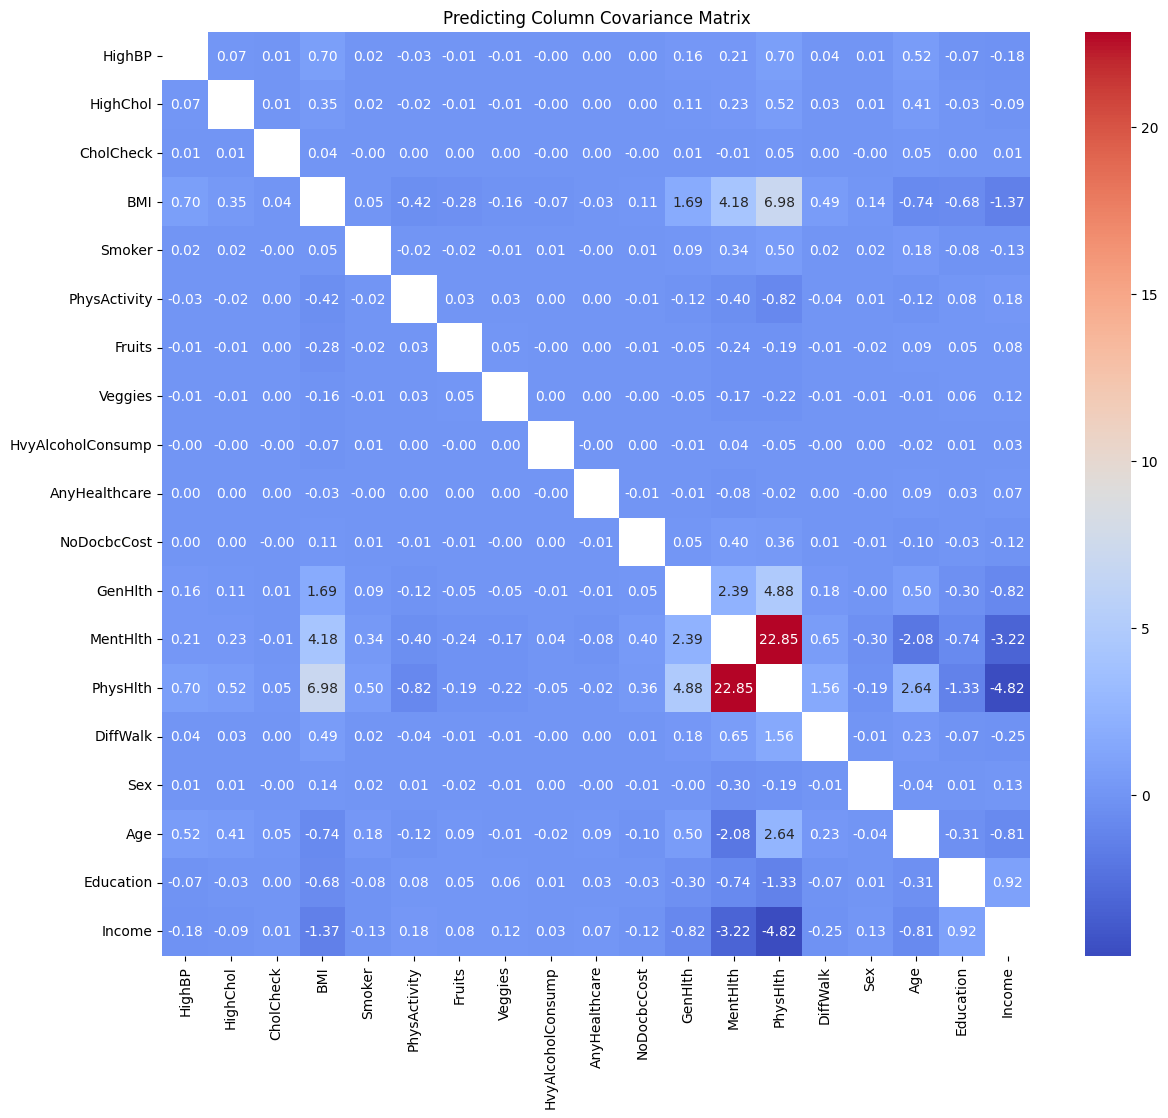

In [59]:
plt.figure(figsize = (14, 12))
sns.heatmap(cov_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, 
            yticklabels = row_titles_subset, xticklabels = row_titles_subset, mask=mask_subset)
plt.title('Predicting Column Covariance Matrix')
plt.show()

In [11]:
row_titles = data.columns

In [12]:
cov_matrix = np.cov(data, rowvar=False)

In [15]:
rank = np.linalg.matrix_rank(cov_matrix)
rank

22

In [16]:
mask = np.eye(len(cov_matrix), dtype='bool')
mask.shape

(22, 22)

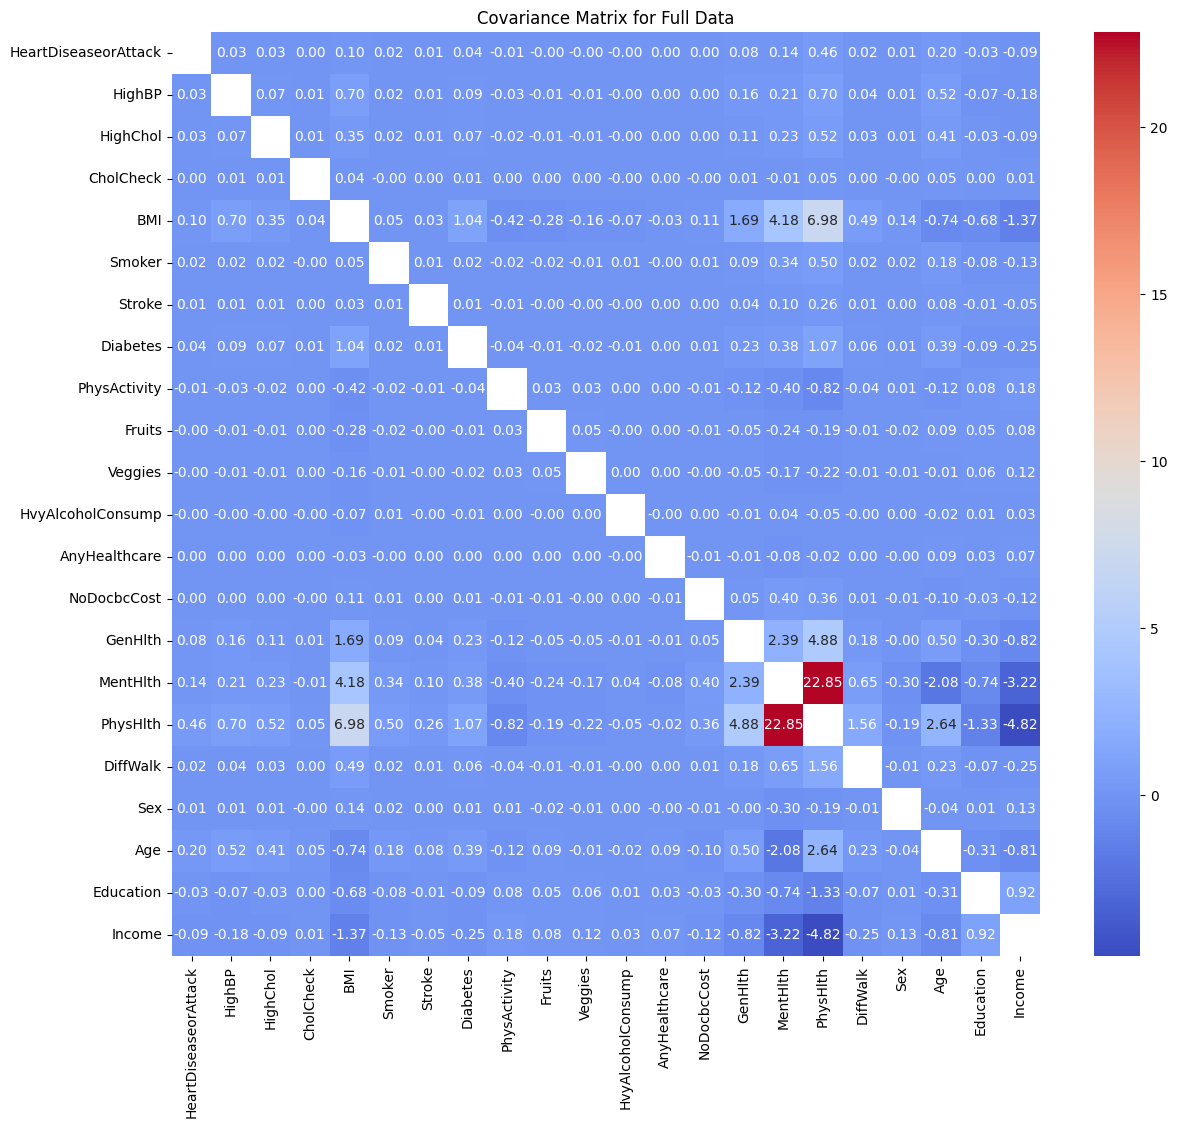

In [17]:
plt.figure(figsize = (14, 12))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, yticklabels=row_titles, xticklabels=row_titles, mask=mask)
plt.title('Covariance Matrix for Full Data')
plt.show()

Heart Disease - Physical Health
Stroke - Physical Health
Diabetes - Physical Health, Age

Physical Health interacts a lot with BMI (6.98) (dimension reduction? interaction?)
Physical Health interacts with mental health (22.85)
Physical Health negative correlation to income. (-4.82)

In [18]:
data.head(n=6)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0


In [55]:
data_interaction = data

data_interaction['PhysHlth_BMI'] = data['PhysHlth'] * data['BMI']
data_interaction['PhysHlth_GenHlth'] = data['PhysHlth'] * data['GenHlth']
data_interaction['PhysHlth_MentHlth'] = data['PhysHlth'] * data['MentHlth']
data_interaction['PhysHlth_Income'] = data['PhysHlth'] * data['Income']
data_interaction['Age_BMI'] = data['Age'] * data['BMI']
data_interaction['Age_PhysHlth'] = data['Age'] * data['PhysHlth']
data_interaction['BMI_GenHlth'] = data['BMI'] * data['GenHlth']

data_interaction.head(n=6)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,Age,Education,Income,PhysHlth_BMI,PhysHlth_MentHlth,PhysHlth_Income,PhysHlth_GenHlth,Age_BMI,Age_PhysHlth,BMI_GenHlth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,9.0,4.0,3.0,600.0,270.0,45.0,75.0,360.0,135.0,200.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,7.0,6.0,1.0,0.0,0.0,0.0,0.0,175.0,0.0,75.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,9.0,4.0,8.0,840.0,900.0,240.0,150.0,252.0,270.0,140.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,11.0,3.0,6.0,0.0,0.0,0.0,0.0,297.0,0.0,54.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,11.0,5.0,4.0,0.0,0.0,0.0,0.0,264.0,0.0,48.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,10.0,6.0,8.0,50.0,0.0,16.0,4.0,250.0,20.0,50.0


In [56]:
cov_matrix_interaction = np.cov(data_interaction, rowvar=False)

In [57]:
row_titles_interaction = data_interaction.columns

In [58]:
mask_interaction = np.eye(len(cov_matrix_interaction), dtype='bool')
mask_interaction.shape

(29, 29)

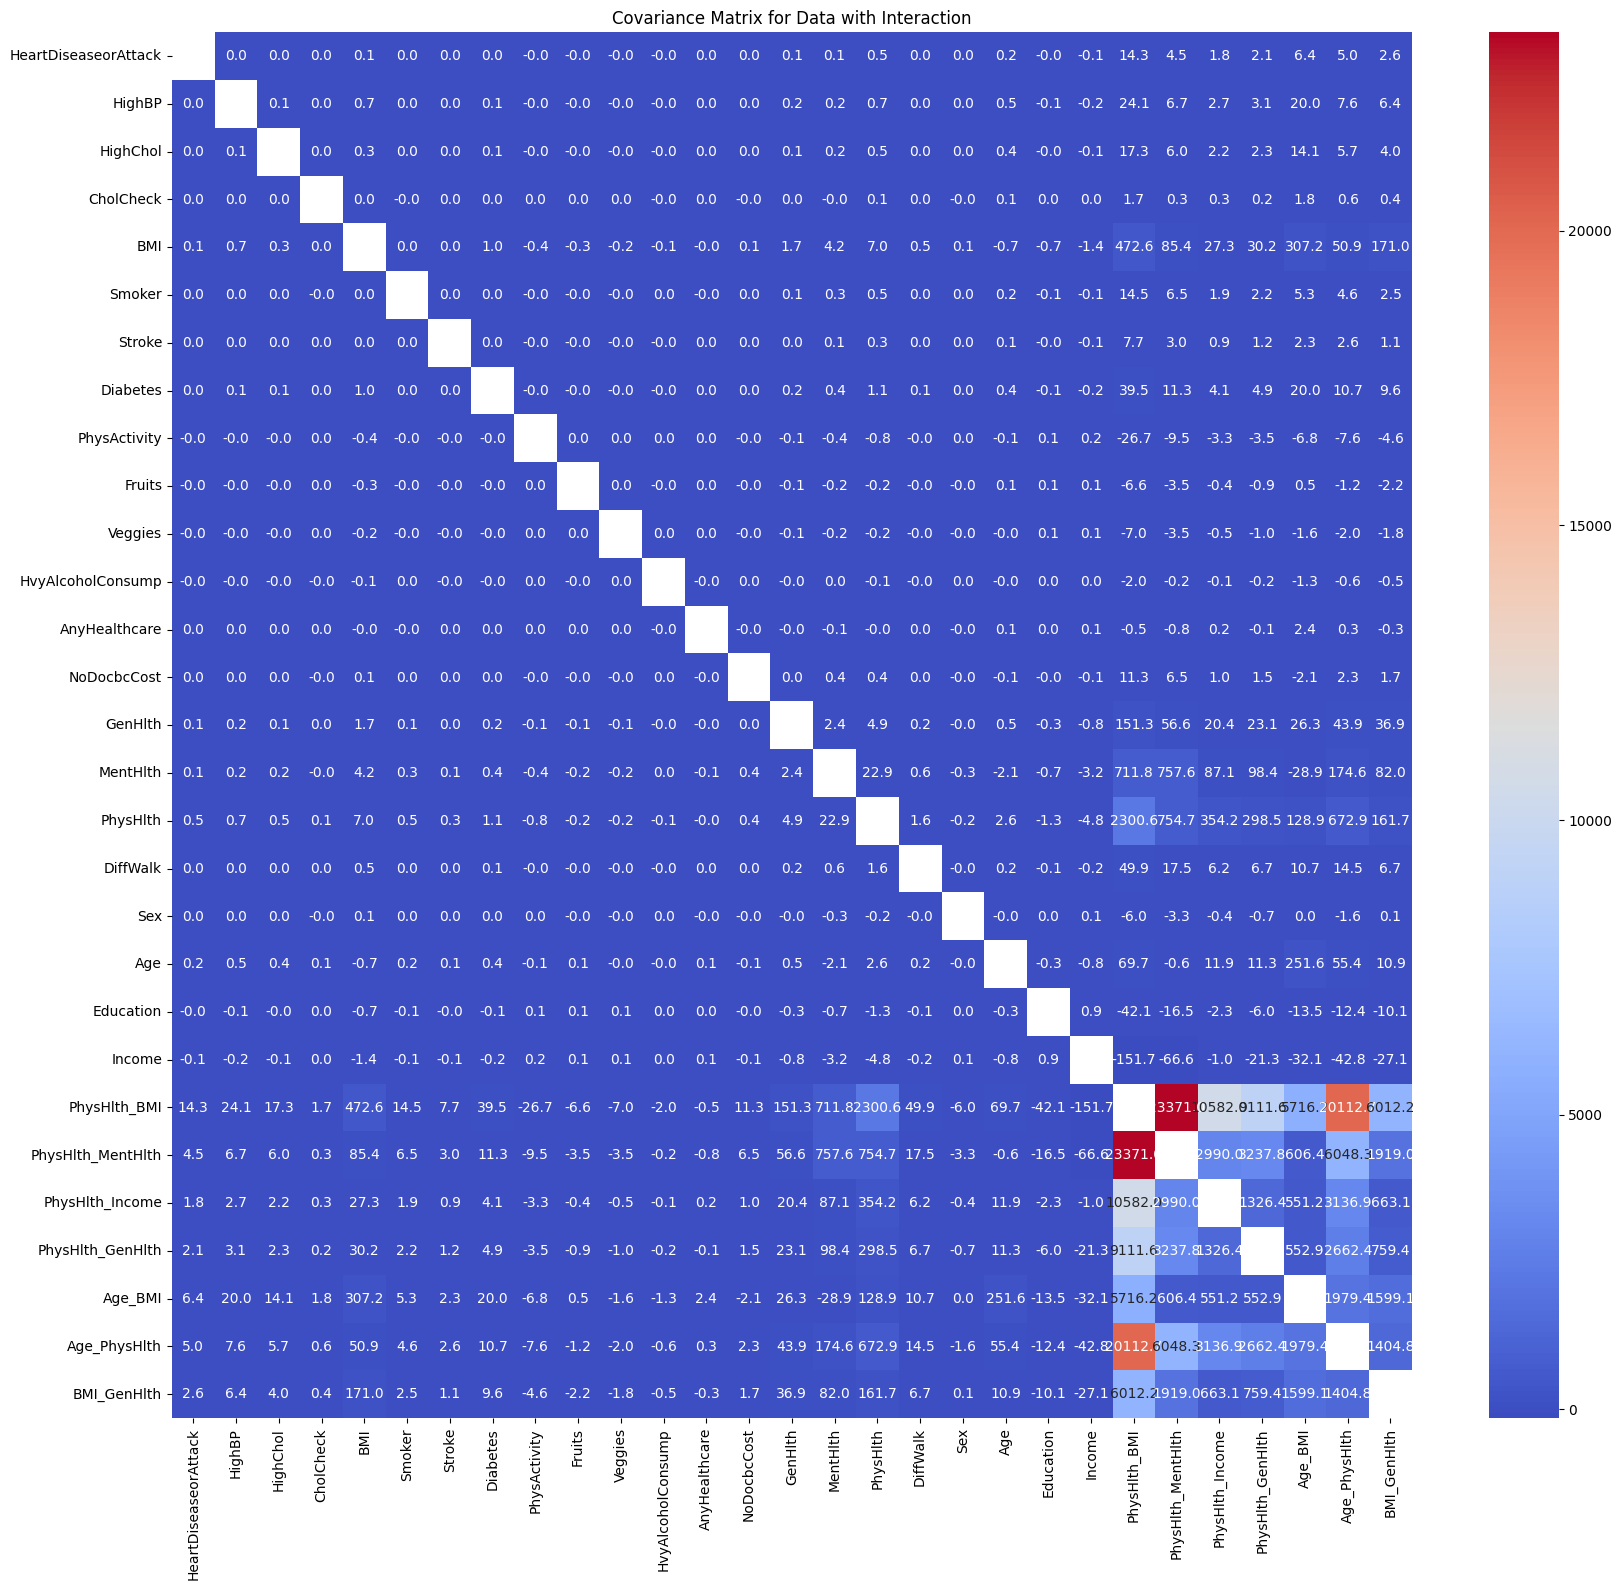

In [59]:
plt.figure(figsize = (20, 18))
sns.heatmap(cov_matrix_interaction, annot=True, cmap='coolwarm', fmt=".1f", cbar=True, 
            yticklabels = row_titles_interaction, xticklabels = row_titles_interaction, mask=mask_interaction)
plt.title('Covariance Matrix for Data with Interaction')
plt.show()

### Addressing data imbalance

In [11]:
data_targets = data[['HeartDiseaseorAttack', 'Stroke', 'Diabetes']]
data_targets.tail(n=6)

,HeartDiseaseorAttack,Stroke,Diabetes
253674,0.0,0.0,0.0
253675,0.0,0.0,0.0
253676,0.0,0.0,2.0
253677,0.0,0.0,0.0
253678,0.0,0.0,0.0
253679,1.0,0.0,2.0


In [12]:
# diabetes: 0 = has no history, 1 = currently pre-diabetic, 2 = has either type of diabetes (I and II).

print('Stroke unique values:', set(data_targets['Stroke']))
print('HeartDiseaseorAttack unique values:', set(data_targets['HeartDiseaseorAttack']))
print('Diabetes unique values:', set(data_targets['Diabetes']))

Stroke unique values: {0.0, 1.0}
HeartDiseaseorAttack unique values: {0.0, 1.0}
Diabetes unique values: {0.0, 1.0, 2.0}


In [13]:
data_labels = []

for index, row in data_targets.iterrows():
    heart = row['HeartDiseaseorAttack']
    stroke = row['Stroke']
    diabetes = row['Diabetes']
    
    if heart == 0 and stroke == 0 and diabetes == 0:
        data_labels.append('Healthy')
    elif heart == 0 and stroke == 0 and diabetes == 1:
        data_labels.append('PreDiabetic')
    elif heart == 0 and stroke == 0 and diabetes == 2:
        data_labels.append('Diabetic')
    elif heart == 0 and stroke == 1 and diabetes == 0:
        data_labels.append('Stroke')
    elif heart == 0 and stroke == 1 and diabetes == 1:
        data_labels.append('Stroke_PreDiabetic')
    elif heart == 0 and stroke == 1 and diabetes == 2:
        data_labels.append('Stroke_Diabetic')
    elif heart == 1 and stroke == 0 and diabetes == 0:
        data_labels.append('Heart')
    elif heart == 1 and stroke == 0 and diabetes == 1:
        data_labels.append('Heart_PreDiabetic')
    elif heart == 1 and stroke == 0 and diabetes == 2:
        data_labels.append('Heart_Diabetes')
    elif heart == 1 and stroke == 1 and diabetes == 0:
        data_labels.append('Heart_Stroke')
    elif heart == 1 and stroke == 1 and diabetes == 1:
        data_labels.append('Heart_Stroke_PreDiabetic')
    elif heart == 1 and stroke == 1 and diabetes == 2:
        data_labels.append('Heart_Stroke_Diabetic')

print(len(data_targets))
len(data_labels)

253680


253680

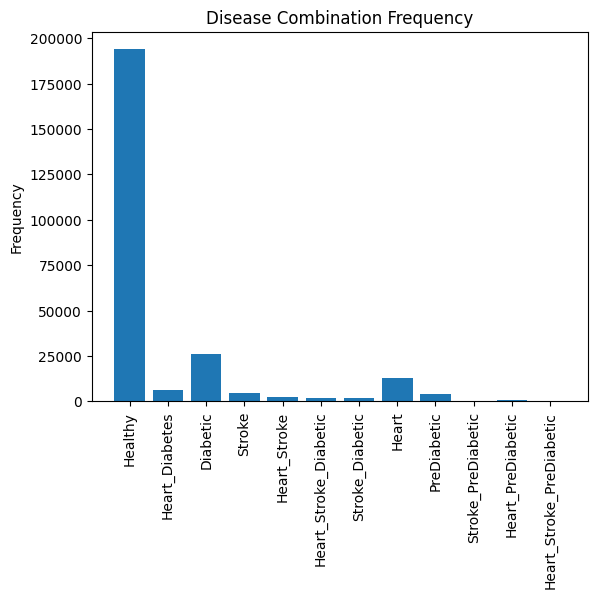

In [14]:
frequency = Counter(data_labels)
freq_dict = dict(frequency)

plt.bar(freq_dict.keys(), freq_dict.values())
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.title('Disease Combination Frequency')
plt.show()

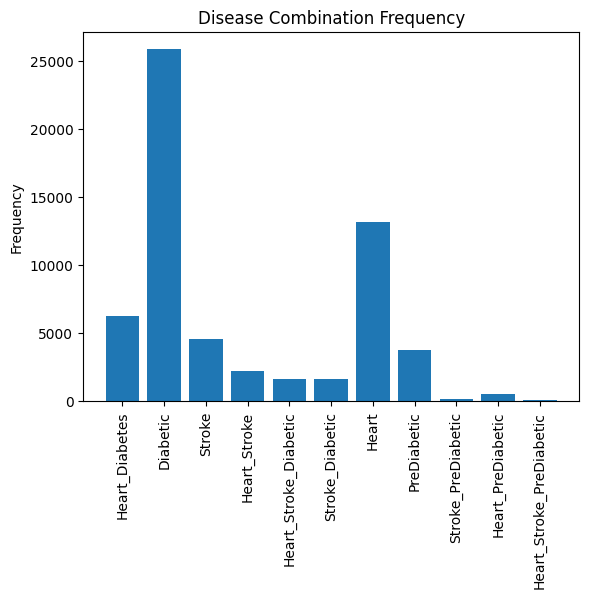

In [16]:
data_labels_unhealthy = [label for label in data_labels if label != 'Healthy']

frequency_unhealthy = Counter(data_labels_unhealthy)
freq_dict_unhealthy = dict(frequency_unhealthy)

plt.bar(freq_dict_unhealthy.keys(), freq_dict_unhealthy.values())
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.title('Disease Combination Frequency')
plt.show()

In [37]:
prop_dict = {}
data_len = 253680

for key, val in freq_dict.items():
    prop_dict[key] = "{:.5f}".format(val/data_len)

In [38]:
prop_dict

{'Healthy': '0.76393',
 'Heart_Diabetes': '0.02461',
 'Diabetic': '0.10184',
 'Stroke': '0.01797',
 'Heart_Stroke': '0.00867',
 'Heart_Stroke_Diabetic': '0.00645',
 'Stroke_Diabetic': '0.00643',
 'Heart': '0.05184',
 'PreDiabetic': '0.01499',
 'Stroke_PreDiabetic': '0.00065',
 'Heart_PreDiabetic': '0.00222',
 'Heart_Stroke_PreDiabetic': '0.00040'}

In [45]:
healthy_count = freq_dict['Healthy']
healthy_count

193793

In [47]:
data_subset_label = data_subset
data_subset_label['label'] = data_labels
data_subset_label.tail(n=6)

,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,label
253674,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0,Healthy
253675,1.0,1.0,1.0,45.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,Healthy
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,Diabetic
253677,0.0,0.0,1.0,28.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,Healthy
253678,1.0,0.0,1.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,Healthy
253679,1.0,1.0,1.0,25.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0,Heart_Diabetes


In [64]:
rows_to_keep = healthy_count // 4
filtered_df = data_subset_label[data_subset_label['label'] == 'Healthy']
filtered_df = filtered_df.sample(n=rows_to_keep, random_state=42)

data_subset_label_final = pd.concat([filtered_df, data_subset_label[data_subset_label['label'] != 'Healthy']])

# If you want to reset the index of the final DataFrame after concatenation
data_subset_label_final = data_subset_label_final.reset_index(drop=True)

data_subset_label_final.head(n=3)

,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,label
0,0.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,12.0,6.0,7.0,Healthy
1,1.0,1.0,1.0,22.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0,Healthy
2,1.0,0.0,1.0,29.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,5.0,7.0,Healthy


In [65]:
subset_label_freq = data_subset_label_final['label'].value_counts()
subset_label_freq = dict(subset_label_freq)

data_subset_label_final_len = len(data_subset_label_final)

for key, val in subset_label_freq.items():
    subset_label_freq[key] = val / data_subset_label_final_len

subset_label_freq

{'Healthy': 0.447205427608806,
 'Diabetic': 0.2384824848848479,
 'Heart': 0.12139197858494484,
 'Heart_Diabetes': 0.05761757511422901,
 'Stroke': 0.0420824295010846,
 'PreDiabetic': 0.03510407532191812,
 'Heart_Stroke': 0.020307379886463285,
 'Heart_Stroke_Diabetic': 0.01510130613375179,
 'Stroke_Diabetic': 0.01506438362486731,
 'Heart_PreDiabetic': 0.005196843125490377,
 'Stroke_PreDiabetic': 0.0015138228642636268,
 'Heart_Stroke_PreDiabetic': 0.0009322933493330871}

### Fit PCA to the data (linearity assumption)

#### PCA for original proportion data

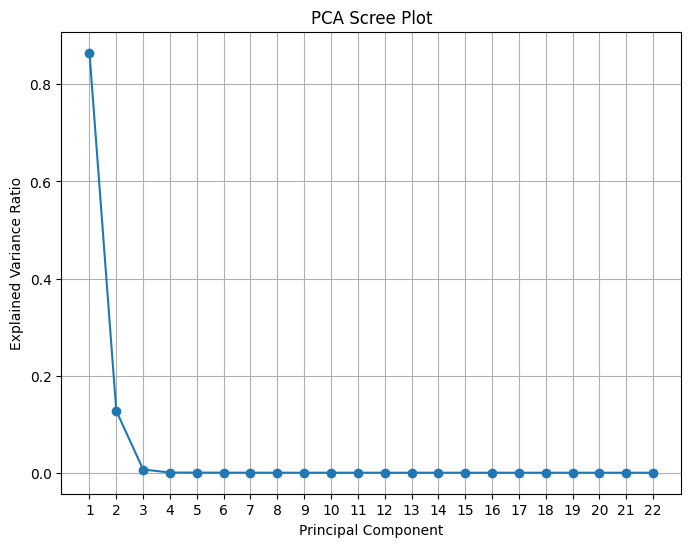

In [85]:
pca = PCA()
pca.fit(data_subset)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [33]:
pca = PCA(n_components=2)
x_new = pca.fit_transform(data_subset)
x_inv = pca.inverse_transform(x_new)

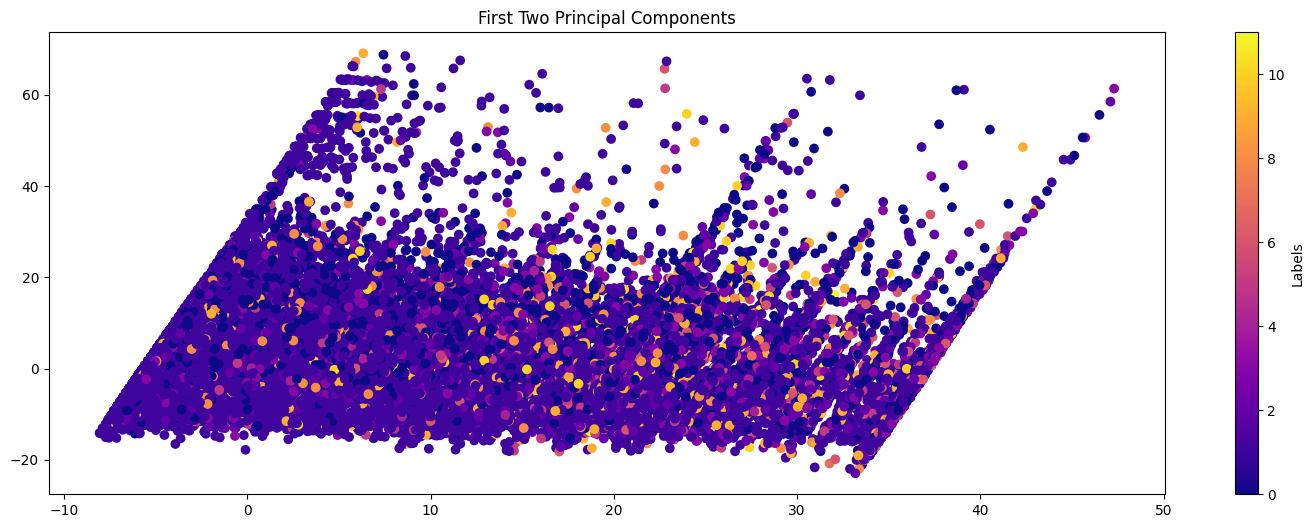

In [34]:
pc_one = x_new[:, 0]
pc_two = x_new[:, 1]

labels = data_labels

plt.scatter(pc_one, pc_two, c=encoded_texts, cmap='plasma')
plt.title('First Two Principal Components')
plt.colorbar(label='Labels')
plt.gcf().set_size_inches(18, 6)
plt.show()

#### PCA for proportion adjusted data

In [71]:
data_subset_label_final_copy = data_subset_label_final.drop(columns=['label'])

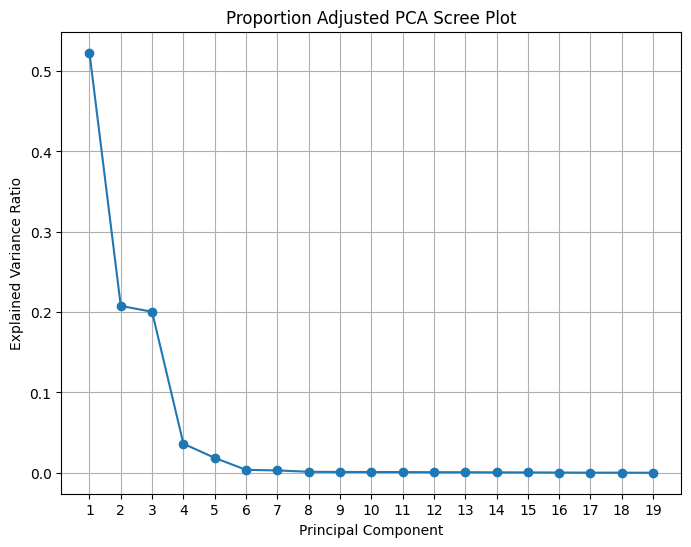

In [81]:
pca = PCA()
pca.fit(data_subset_label_final_copy)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Proportion Adjusted PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [75]:
pca = PCA(n_components=3)
x_new = pca.fit_transform(data_subset_label_final_copy)
x_inv = pca.inverse_transform(x_new)

C:\Users\cheif\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


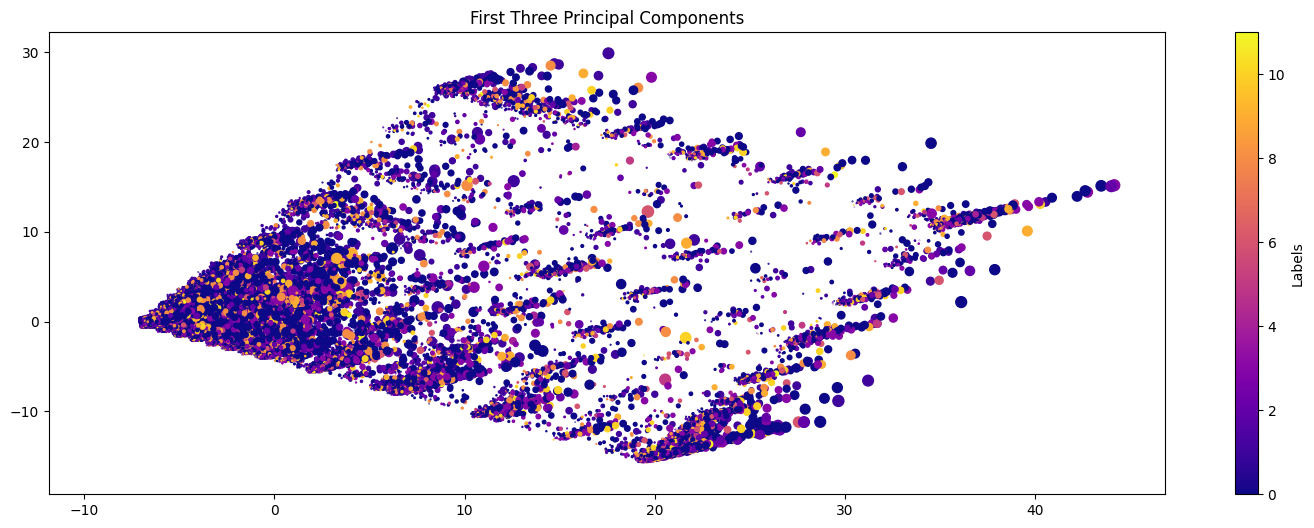

In [76]:
pc_one = x_new[:, 0]
pc_two = x_new[:, 1]
pc_three = x_new[:, 2]

labels = data_subset_label_final['label']

plt.scatter(pc_one, pc_two, pc_three, c=encoded_texts, cmap='plasma')
plt.title('First Three Principal Components')
plt.colorbar(label='Labels')
plt.gcf().set_size_inches(18, 6)
plt.show()

### K-Modes Clustering

In [71]:
# Hierarchical Clustering required allocating too much memory for my poor potato computer (240+GiB)

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)  # Specify the number of clusters and initialization method
clusters = km.fit_predict(data_subset)

# Add cluster labels to the dataset
data_subset['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 53327, cost: 1621924.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 73277, cost: 1615308.0
Run 2, iteration: 2/100, moves: 18355, cost: 1611939.0
Run 2, iteration: 3/100, moves: 3012, cost: 1611939.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 59470, cost: 1609224.0
Run 3, iteration: 2/100, moves: 44089, cost: 1584335.0
Run 3, iteration: 3/100, moves: 13839, cost: 1577323.0
Run 3, iteration: 4/100, moves: 678, cost: 1577323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 85477, cost: 1613289.0
Run 4, iteration: 2/100, moves: 10582, cost: 1613289.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 70879, cost: 1613607.

In [72]:
data_subset.head(n=20)

,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Cluster
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,2
1,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,2
3,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0
5,1.0,1.0,1.0,25.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,1
6,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,2
7,1.0,1.0,1.0,25.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0,2
8,1.0,1.0,1.0,30.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,2
9,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0,0


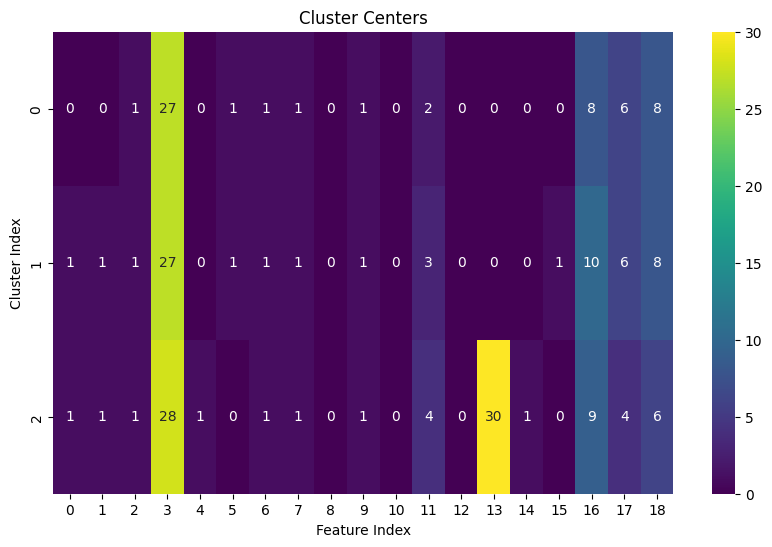

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(km.cluster_centroids_, annot=True, cmap='viridis')
plt.title('Cluster Centers')
plt.xlabel('Feature Index')
plt.ylabel('Cluster Index')
plt.show()

### Mutual Information

#### Original Data

In [16]:
data_targets.tail(n=6)

,HeartDiseaseorAttack,Stroke,Diabetes
253674,0.0,0.0,0.0
253675,0.0,0.0,0.0
253676,0.0,0.0,2.0
253677,0.0,0.0,0.0
253678,0.0,0.0,0.0
253679,1.0,0.0,2.0


In [22]:
mutual_info_heart = mutual_info_classif(data_subset, data_targets['HeartDiseaseorAttack'])

In [23]:
mutual_info_stroke = mutual_info_classif(data_subset, data_targets['Stroke'])

In [24]:
mutual_info_diabetes = mutual_info_classif(data_subset, data_targets['Diabetes'])

In [42]:
m_info_df = pd.DataFrame({'Heart_Disease_or_Attack': mutual_info_heart,
                          'Stroke': mutual_info_stroke,
                          'Diabetes': mutual_info_diabetes})

m_info_df.index = data_subset.columns

color_map = 'RdBu'
cmap = cm.get_cmap(color_map)
reversed_cmap = cmap.reversed()

m_info_df = m_info_df.style.background_gradient(cmap=reversed_cmap)

m_info_df

C:\Users\cheif\AppData\Local\Temp\ipykernel_3864\101020390.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


,Heart_Disease_or_Attack,Stroke,Diabetes
HighBP,0.044745,0.035176,0.056198
HighChol,0.039109,0.030780,0.039894
CholCheck,0.051612,0.056605,0.045990
BMI,0.004789,0.003702,0.032879
Smoker,0.031694,0.031565,0.022906
PhysActivity,0.049808,0.053707,0.048350
Fruits,0.042428,0.048746,0.038790
Veggies,0.044471,0.050215,0.041578
HvyAlcoholConsump,0.002600,0.000747,0.002459
AnyHealthcare,0.057565,0.064358,0.050334


#### Data with Interaction Terms

In [62]:
data_interaction_subset = data_interaction.drop(columns=['HeartDiseaseorAttack', 'Stroke', 'Diabetes'])

In [63]:
data_interaction_subset.tail(n=6)

,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,Age,Education,Income,PhysHlth_BMI,PhysHlth_MentHlth,PhysHlth_Income,PhysHlth_GenHlth,Age_BMI,Age_PhysHlth,BMI_GenHlth
253674,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,81.0,0.0,27.0
253675,1.0,1.0,1.0,45.0,0.0,0.0,1.0,1.0,0.0,1.0,...,5.0,6.0,7.0,225.0,0.0,35.0,15.0,225.0,25.0,135.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,...,11.0,2.0,4.0,0.0,0.0,0.0,0.0,198.0,0.0,72.0
253677,0.0,0.0,1.0,28.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,5.0,2.0,0.0,0.0,0.0,0.0,56.0,0.0,28.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,...,7.0,5.0,1.0,0.0,0.0,0.0,0.0,161.0,0.0,69.0
253679,1.0,1.0,1.0,25.0,0.0,1.0,1.0,0.0,0.0,1.0,...,9.0,6.0,2.0,0.0,0.0,0.0,0.0,225.0,0.0,50.0


In [64]:
mutual_info_heart_interaction = mutual_info_classif(data_interaction_subset, data_targets['HeartDiseaseorAttack'])
mutual_info_stroke_interaction = mutual_info_classif(data_interaction_subset, data_targets['Stroke'])
mutual_info_diabetes_interaction = mutual_info_classif(data_interaction_subset, data_targets['Diabetes'])

In [65]:
m_info_df_interact = pd.DataFrame({'Heart_Disease_or_Attack': mutual_info_heart_interaction,
                                   'Stroke': mutual_info_stroke_interaction,
                                   'Diabetes': mutual_info_diabetes_interaction})

m_info_df_interact.index = data_interaction_subset.columns

color_map = 'RdBu'
cmap = cm.get_cmap(color_map)
reversed_cmap = cmap.reversed()

m_info_df_interact = m_info_df_interact.style.background_gradient(cmap=reversed_cmap)

m_info_df_interact

C:\Users\cheif\AppData\Local\Temp\ipykernel_3864\1661972478.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


,Heart_Disease_or_Attack,Stroke,Diabetes
HighBP,0.045031,0.035578,0.054854
HighChol,0.038114,0.031018,0.040049
CholCheck,0.053028,0.056547,0.046755
BMI,0.004345,0.003604,0.032121
Smoker,0.031816,0.032043,0.025606
PhysActivity,0.050061,0.054563,0.047665
Fruits,0.042228,0.048524,0.039824
Veggies,0.044799,0.050748,0.040548
HvyAlcoholConsump,0.002154,0.000504,0.002095
AnyHealthcare,0.056814,0.062537,0.050670


#### All 12 Disease Combinations

In [61]:
vectorizer = CountVectorizer()

tdm = vectorizer.fit_transform(data_labels)
terms = vectorizer.get_feature_names_out()
data_combo_matrix = pd.DataFrame(tdm.toarray(), columns=terms)
data_combo_matrix.head(n=6)

,diabetic,healthy,heart,heart_diabetes,heart_prediabetic,heart_stroke,heart_stroke_diabetic,heart_stroke_prediabetic,prediabetic,stroke,stroke_diabetic,stroke_prediabetic
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0


In [62]:
m_info_df_combo = {}

for col in data_combo_matrix.columns:
    m_info_df_combo[col] = mutual_info_classif(data_subset, data_combo_matrix[col])

m_info_df_combo = pd.DataFrame(m_info_df_combo)

In [63]:
m_info_df_combo.index = data_subset.columns
m_info_df_combo = m_info_df_combo.transpose()

color_map = 'RdBu'
cmap = cm.get_cmap(color_map)
reversed_cmap = cmap.reversed()

m_info_df_combo = m_info_df_combo.style.background_gradient(cmap=reversed_cmap)

m_info_df_combo

C:\Users\cheif\AppData\Local\Temp\ipykernel_600\3351620053.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
diabetic,0.040778,0.032454,0.052355,0.022682,0.027185,0.047881,0.043706,0.045690,0.003152,0.057178,0.000471,0.033216,0.001439,0.005551,0.009807,0.026553,0.014937,0.020082,0.015155
healthy,0.070265,0.050494,0.043485,0.022488,0.025529,0.046383,0.033917,0.037187,0.002834,0.045451,0.001200,0.079823,0.006194,0.028055,0.037156,0.023202,0.047578,0.026395,0.032567
heart,0.033830,0.031804,0.055635,0.002823,0.032110,0.050444,0.046432,0.048380,0.000696,0.061776,0.001370,0.020773,0.001204,0.004140,0.007894,0.030217,0.019327,0.019783,0.012362
heart_diabetes,0.037314,0.033302,0.058970,0.006961,0.033434,0.055173,0.048456,0.051406,0.001210,0.065569,0.001097,0.024737,0.002210,0.006269,0.011408,0.031745,0.012948,0.020683,0.014601
heart_prediabetic,0.031327,0.030529,0.061842,0.003205,0.032634,0.055567,0.051005,0.053539,0.001133,0.068647,0.001346,0.012705,0.001338,0.001569,0.005063,0.032154,0.005945,0.020115,0.011251
heart_stroke,0.032131,0.030563,0.059492,0.003347,0.032998,0.055144,0.051287,0.051959,0.001101,0.067343,0.001131,0.016271,0.001632,0.003587,0.007473,0.032089,0.008234,0.020716,0.012457
heart_stroke_diabetic,0.033069,0.031047,0.060523,0.004119,0.032937,0.055499,0.050927,0.052757,0.001101,0.067500,0.001288,0.018289,0.001967,0.004436,0.008849,0.032188,0.007293,0.020698,0.013430
heart_stroke_prediabetic,0.031210,0.030177,0.061443,0.003224,0.033038,0.055130,0.051477,0.053572,0.001036,0.069230,0.001154,0.012453,0.001177,0.001276,0.004868,0.032238,0.005604,0.020194,0.010747
prediabetic,0.031091,0.029393,0.059543,0.004475,0.032486,0.054049,0.050183,0.052088,0.001318,0.067438,0.001641,0.013244,0.001252,0.001181,0.004553,0.032496,0.005939,0.019674,0.011247
stroke,0.030949,0.029352,0.059371,0.003006,0.032168,0.052247,0.049379,0.052104,0.000662,0.066864,0.001382,0.015159,0.001186,0.002846,0.006521,0.031652,0.008534,0.020236,0.012727


In [64]:
m_info_df_combo.to_html('Mutual_Information_Combination_DataFrame.html', index=False)